In [11]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os

In [1]:
scd_data = {'./data/scddb/30': '07:54:33',
 './data/scddb/31': '13:42:24',
 './data/scddb/32': '16:45:18',
 './data/scddb/33': '04:46:19',
 './data/scddb/34': '06:35:44',
 './data/scddb/35': '24:34:56',
 './data/scddb/36': '18:59:01',
 './data/scddb/37': '01:31:13',
 './data/scddb/38': '08:01:54',
 './data/scddb/39': '04:37:51',
 './data/scddb/41': '02:59:24',
 './data/scddb/43': '15:37:11',
 './data/scddb/44': '19:38:45',
 './data/scddb/45': '18:09:17',
 './data/scddb/46': '03:41:47',
 './data/scddb/47': '06:13:01',
 './data/scddb/48': '02:29:40',
 './data/scddb/50': '11:45:43',
 './data/scddb/51': '22:58:23',
 './data/scddb/52': '02:32:40'}

In [13]:
fs = 250

In [7]:
def hms_to_seconds(hms):
    h, m, s = hms.split(':')
    return int(h)*3600 + int(m)*60 + int(s)

In [25]:
def extract_before_onset_VF(vfon_dict, minutes_before=30):
    ecg_data_map = {} 

    for record_path, vf_onset_str in vfon_dict.items():
        # record_path might be '.data/scddb/30'
        record_dir, record_name = os.path.split(record_path)

        # 2) Convert dictionary's VF onset to seconds
        vf_onset_original_sec = hms_to_seconds(vf_onset_str)

        vfon_onset_original_sample = vf_onset_original_sec * fs

        seg_len_samples = int(minutes_before * 60 * fs)

        start_sample = vfon_onset_original_sample - seg_len_samples

         # read .dat between those sample indices
        try:
            #record_dat_path = os.path.join(record_dir, record_name)  # base path
            record_path_dat = os.path.join(record_dir, record_name)
            segment = wfdb.rdrecord(record_path_dat, sampfrom=start_sample, sampto=vfon_onset_original_sample)
            
        except Exception as e:
            print(f"[ERROR] Failed to read record {record_dat_path}: {e}")
            continue

        # Retrieve the raw signal data as a NumPy array
        if segment.p_signal is not None:
            arr = segment.p_signal[:,0]
            ecg_data_map[record_name] = arr
            print(f"[OK] Extracted 30-min for {record_name}: shape={arr.shape}")
        else:
            print(f"[WARNING] No p_signal found for {record_name}")

    return ecg_data_map
    

In [38]:
x = extract_before_onset_VF(scd_data, minutes_before=30)

[OK] Extracted 30-min for 30: shape=(450000,)
[OK] Extracted 30-min for 31: shape=(450000,)
[OK] Extracted 30-min for 32: shape=(450000,)
[OK] Extracted 30-min for 33: shape=(450000,)
[OK] Extracted 30-min for 34: shape=(450000,)
[OK] Extracted 30-min for 35: shape=(450000,)
[OK] Extracted 30-min for 36: shape=(450000,)
[OK] Extracted 30-min for 37: shape=(450000,)
[OK] Extracted 30-min for 38: shape=(450000,)
[OK] Extracted 30-min for 39: shape=(450000,)
[OK] Extracted 30-min for 41: shape=(450000,)
[OK] Extracted 30-min for 43: shape=(450000,)
[OK] Extracted 30-min for 44: shape=(450000,)
[OK] Extracted 30-min for 45: shape=(450000,)
[OK] Extracted 30-min for 46: shape=(450000,)
[OK] Extracted 30-min for 47: shape=(450000,)
[OK] Extracted 30-min for 48: shape=(450000,)
[OK] Extracted 30-min for 50: shape=(450000,)
[OK] Extracted 30-min for 51: shape=(450000,)
[OK] Extracted 30-min for 52: shape=(450000,)


In [39]:
x

{'30': array([ 0.11   ,  0.11875,  0.13   , ..., -0.03625, -0.03875, -0.0425 ]),
 '31': array([ 0.0925 ,  0.095  ,  0.09375, ..., -0.10875, -0.105  , -0.10875]),
 '32': array([0.04375, 0.0575 , 0.06125, ..., 0.19375, 0.16625, 0.14625]),
 '33': array([ 0.57625,  0.5825 ,  0.5775 , ..., -0.18   , -0.18   , -0.18   ]),
 '34': array([-0.2375 , -0.2375 , -0.23375, ...,  0.53   ,  0.44625,  0.3775 ]),
 '35': array([-0.2625 , -0.25   , -0.2475 , ..., -0.50375, -0.4975 , -0.4825 ]),
 '36': array([0.09125, 0.13875, 0.21125, ..., 0.00875, 0.01625, 0.01   ]),
 '37': array([-0.02625, -0.02375, -0.02625, ...,  0.1075 ,  0.11375,  0.12375]),
 '38': array([-0.37875, -0.46   , -0.5225 , ...,  0.68375,  0.6575 ,  0.64   ]),
 '39': array([-0.485, -0.45 , -0.445, ...,  0.11 ,  0.06 ,  0.035]),
 '41': array([ 0.18375,  0.185  ,  0.19   , ..., -0.01625,  0.     ,  0.0175 ]),
 '43': array([-0.005  ,  0.     ,  0.0025 , ..., -0.005  , -0.005  , -0.00125]),
 '44': array([-0.145  , -0.1525 , -0.16375, ..., -0.

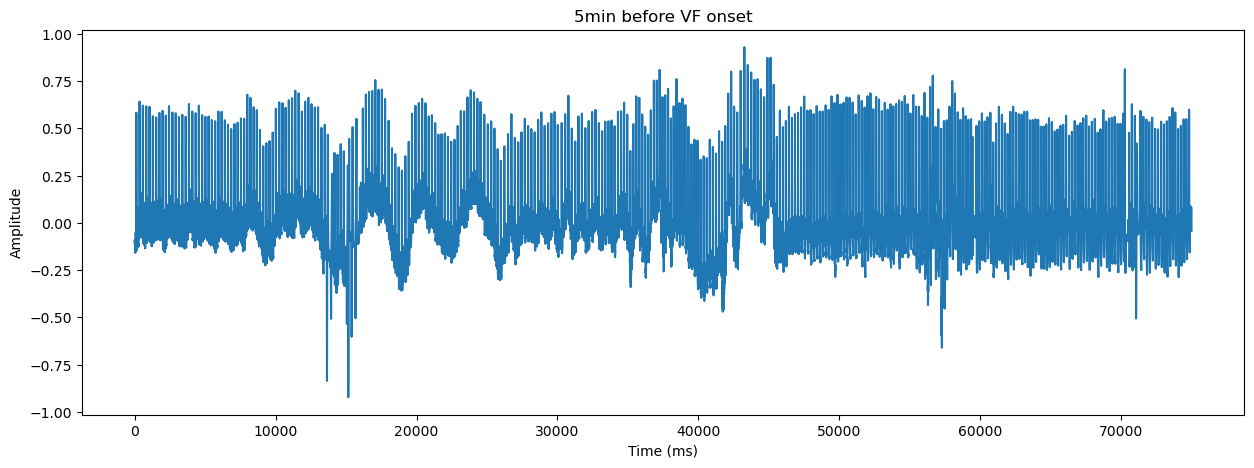

In [48]:
plt.figure(figsize=(15, 5))
plt.subplot()
plt.plot(x['30'][-75000:])
plt.title('5min before VF onset')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()

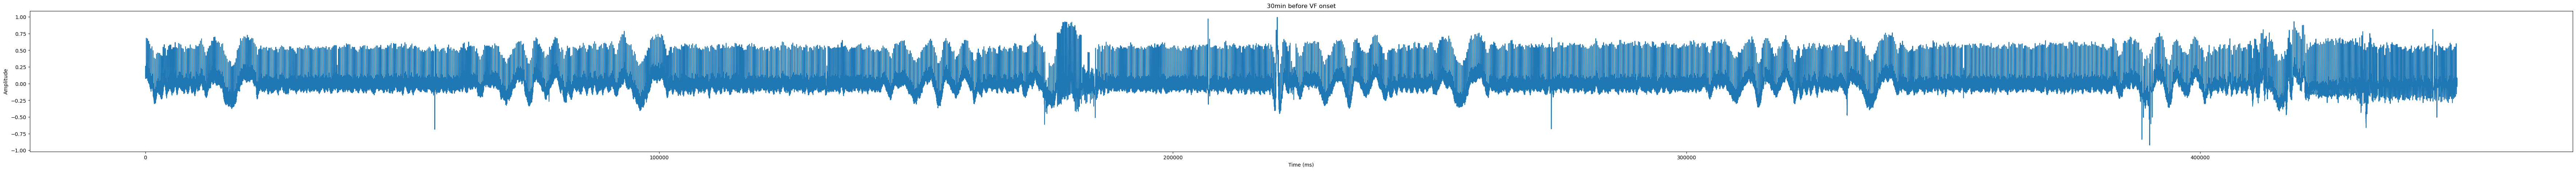

In [49]:
plt.figure(figsize=(90, 5))
plt.subplot()
plt.plot(x['30'])
plt.title('30min before VF onset')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()